<a href="https://colab.research.google.com/github/likeshd/predictive_analysis/blob/main/LSTM_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/export_public_KPIMain_2024_07_09_15_15_16_561.csv')
# data.head(5)

In [3]:
# Select the necessary columns
data1 = data[["month", "year", "address_id", "kpi_em_Total_Emission"]]

# Create the 'actual_date' column by directly using the year and month columns
data1['actual_date'] = pd.to_datetime(data1.assign(day=1)[['year', 'month', 'day']])

# Sort the DataFrame by 'actual_date' in ascending order
data1.sort_values(by='actual_date', inplace=True)
data1.head(10)

<ipython-input-3-3d67cb4b4d4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['actual_date'] = pd.to_datetime(data1.assign(day=1)[['year', 'month', 'day']])
<ipython-input-3-3d67cb4b4d4c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.sort_values(by='actual_date', inplace=True)


,month,year,address_id,kpi_em_Total_Emission,actual_date
21,1,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000,2021-01-01
27,1,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.000000,2021-01-01
23,2,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.000000,2021-02-01
22,2,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000,2021-02-01
36,3,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.000000,2021-03-01
4,3,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000,2021-03-01
56,4,2021,'565a43d6-d52c-4dfa-9776-856135a27883',57.783468,2021-04-01
29,4,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.000000,2021-04-01
70,4,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',814.171210,2021-04-01
57,5,2021,'565a43d6-d52c-4dfa-9776-856135a27883',60.516650,2021-05-01


In [4]:
# data1.info()

In [5]:
locations = data1["address_id"].unique()
locations

array(["'565a43d6-d52c-4dfa-9776-856135a27883'",
       "'bf43afb1-2b9b-401c-989d-7f044074e3ba'",
       "'7c74d921-66ac-41a8-90a6-4ebc05340b87'"], dtype=object)

In [6]:
filtered_df = data1[data1['address_id'] == "'565a43d6-d52c-4dfa-9776-856135a27883'"]
# Drop existing index
filtered_df.reset_index(drop=True, inplace=True)

# Set 'date' column as new index
filtered_df.set_index('actual_date', inplace=True)

filtered_df.head(10)


,month,year,address_id,kpi_em_Total_Emission
actual_date,,,,
2021-01-01,1,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000
2021-02-01,2,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000
2021-03-01,3,2021,'565a43d6-d52c-4dfa-9776-856135a27883',0.000000
2021-04-01,4,2021,'565a43d6-d52c-4dfa-9776-856135a27883',57.783468
2021-05-01,5,2021,'565a43d6-d52c-4dfa-9776-856135a27883',60.516650
2021-06-01,6,2021,'565a43d6-d52c-4dfa-9776-856135a27883',35.918783
2021-07-01,7,2021,'565a43d6-d52c-4dfa-9776-856135a27883',39.172595
2021-08-01,8,2021,'565a43d6-d52c-4dfa-9776-856135a27883',38.416841
2021-09-01,9,2021,'565a43d6-d52c-4dfa-9776-856135a27883',35.179830


In [78]:
# loc = filtered_df.to_excel("location_ex.xlsx")
# print("done")

done


In [7]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2021-01-01 to 2023-01-01
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  25 non-null     int64  
 1   year                   25 non-null     int64  
 2   address_id             25 non-null     object 
 3   kpi_em_Total_Emission  25 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1000.0+ bytes
None


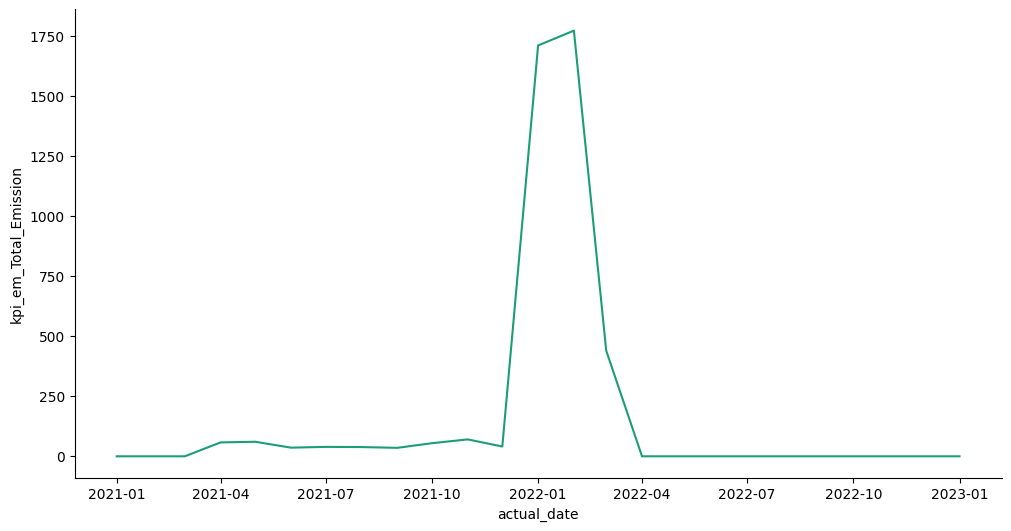

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = series['kpi_em_Total_Emission']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('actual_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('actual_date')
_ = plt.ylabel('kpi_em_Total_Emission')

In [9]:
filtered_df1 = data1[data1['address_id'] == "'bf43afb1-2b9b-401c-989d-7f044074e3ba'"]
# Drop existing index
filtered_df1.reset_index(drop=True, inplace=True)

# Set 'date' column as new index
filtered_df1.set_index('actual_date', inplace=True)

filtered_df1.head(10)


,month,year,address_id,kpi_em_Total_Emission
actual_date,,,,
2021-01-01,1,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0
2021-02-01,2,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0
2021-03-01,3,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0
2021-04-01,4,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0
2021-05-01,5,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0
2021-06-01,6,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0
2021-07-01,7,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0
2021-08-01,8,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0
2021-09-01,9,2021,'bf43afb1-2b9b-401c-989d-7f044074e3ba',0.0


In [10]:
# loc1 = filtered_df1.to_excel("location1.xlsx")
# print("done")

done


In [11]:
print(filtered_df1.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  24 non-null     int64  
 1   year                   24 non-null     int64  
 2   address_id             24 non-null     object 
 3   kpi_em_Total_Emission  24 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 960.0+ bytes
None


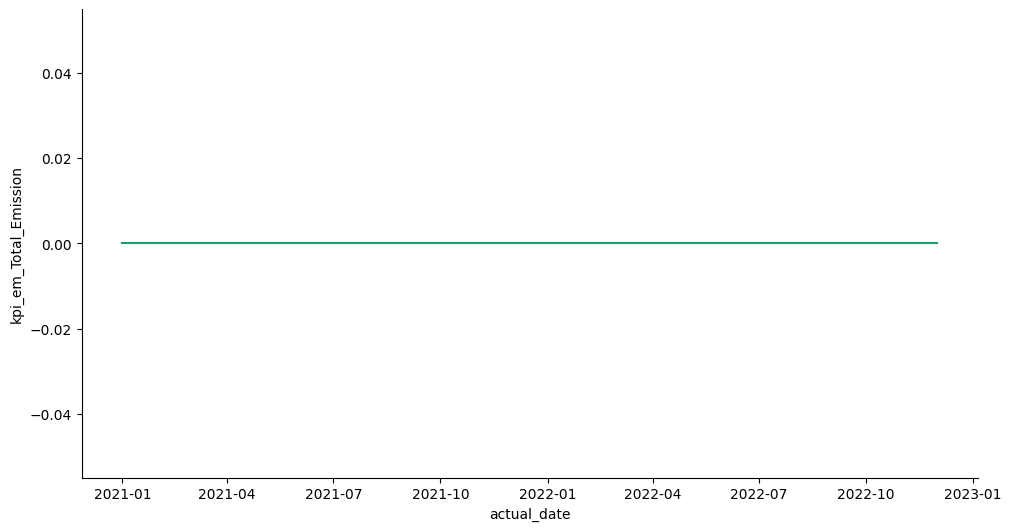

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = series['kpi_em_Total_Emission']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df1.sort_values('actual_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('actual_date')
_ = plt.ylabel('kpi_em_Total_Emission')

In [13]:
filtered_df2 = data1[data1['address_id'] == "'7c74d921-66ac-41a8-90a6-4ebc05340b87'"]
# Drop existing index
filtered_df2.reset_index(drop=True, inplace=True)

# Set 'date' column as new index
filtered_df2.set_index('actual_date', inplace=True)

filtered_df2


,month,year,address_id,kpi_em_Total_Emission
actual_date,,,,
2021-04-01,4,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',814.171210
2021-05-01,5,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1394.955026
2021-06-01,6,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1775.876803
2021-07-01,7,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',919.602242
2021-08-01,8,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1017.354996
2021-09-01,9,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1848.059469
2021-10-01,10,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',1014.146248
2021-11-01,11,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',7427.967614
2021-12-01,12,2021,'7c74d921-66ac-41a8-90a6-4ebc05340b87',257.036164


In [80]:
# loc2 =filtered_df2.to_excel("location2.xlsx")
# print("done")

done


In [14]:
print(filtered_df2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2021-04-01 to 2024-06-01
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  39 non-null     int64  
 1   year                   39 non-null     int64  
 2   address_id             39 non-null     object 
 3   kpi_em_Total_Emission  39 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ KB
None


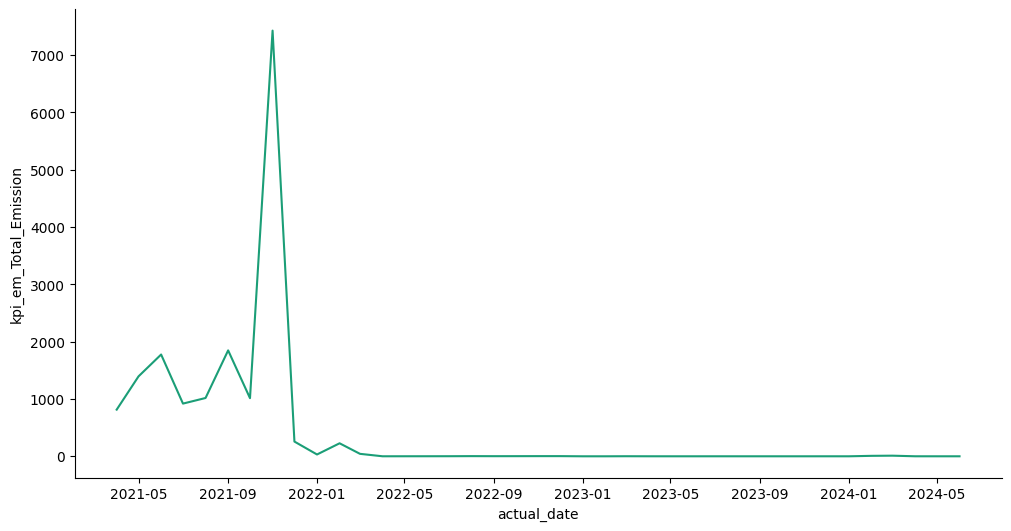

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = series['kpi_em_Total_Emission']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df2.sort_values('actual_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('actual_date')
_ = plt.ylabel('kpi_em_Total_Emission')

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [18]:
# Load data
# Assuming df has columns: 'actual_date', 'kpi_em_Total_Emission'
# filtered_df2['actual_date'] = pd.to_datetime(filtered_df2.index)
# df = filtered_df2.sort_values('actual_date')

In [42]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
filtered_df2['kpi_em_Total_Emission'] = scaler.fit_transform(filtered_df2[['kpi_em_Total_Emission']])
df = filtered_df2
df.tail(5)

<ipython-input-42-c97354340b3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['kpi_em_Total_Emission'] = scaler.fit_transform(filtered_df2[['kpi_em_Total_Emission']])


,month,year,address_id,kpi_em_Total_Emission,actual_date
actual_date,,,,,
2024-02-01,2,2024,'7c74d921-66ac-41a8-90a6-4ebc05340b87',0.001073,2024-02-01
2024-03-01,3,2024,'7c74d921-66ac-41a8-90a6-4ebc05340b87',0.001446,2024-03-01
2024-04-01,4,2024,'7c74d921-66ac-41a8-90a6-4ebc05340b87',0.000047,2024-04-01
2024-05-01,5,2024,'7c74d921-66ac-41a8-90a6-4ebc05340b87',0.000017,2024-05-01
2024-06-01,6,2024,'7c74d921-66ac-41a8-90a6-4ebc05340b87',0.000007,2024-06-01


In [21]:
# Prepare data for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        a = data[i:(i + time_steps), 0]
        X.append(a)
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [22]:
time_steps = 10
emissions_data = df['kpi_em_Total_Emission'].values.reshape(-1, 1)
X, y = create_dataset(emissions_data, time_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 6.0694e-05 - val_loss: 1.9809e-04
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 2.4698e-04 - val_loss: 1.1241e-04
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 3.5929e-05 - val_loss: 2.2070e-04
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 1.8521e-05 - val_loss: 3.6056e-04
Epoch 5/100
1/1 [==============================] - 0s 54ms/step - loss: 1.1277e-04 - val_loss: 3.2553e-04
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 9.6696e-05 - val_loss: 1.9978e-04
Epoch 7/100
1/1 [==============================] - 0s 49ms/step - loss: 4.5424e-05 - val_loss: 8.8418e-05
Epoch 8/100
1/1 [==============================] - 0s 50ms/step - loss: 1.0724e-05 - val_loss: 3.5673e-05
Epoch 9/100
1/1 [==============================] - 0s 49ms/step - loss: 3.0029e-05 - val_loss: 2.8807e-05
Epoch 10/100
1/1 [==============================

In [23]:
# Evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

mse_train, rmse_train, mae_train = evaluate_model(y_train, train_predict)
mse_test, rmse_test, mae_test = evaluate_model(y_test, test_predict)
print(f"Train MSE: {mse_train}, Train RMSE: {rmse_train}, Train MAE: {mae_train}")
print(f"Test MSE: {mse_test}, Test RMSE: {rmse_test}, Test MAE: {mae_test}")

Train MSE: 2.909253425422647e-06, Train RMSE: 0.0017056533720022503, Train MAE: 0.0014400460959593708
Test MSE: 0.0001386206394365908, Test RMSE: 0.011773726658819237, Test MAE: 0.005520107343199045


In [24]:
# Baseline model (e.g., simple moving average)
def moving_average_forecast(data, window_size):
    return np.mean(data[-window_size:])

# Evaluate baseline model
baseline_predict = np.array([moving_average_forecast(emissions_data, time_steps) for _ in range(len(y_test))])
baseline_predict = scaler.inverse_transform(baseline_predict.reshape(-1, 1))

mse_baseline, rmse_baseline, mae_baseline = evaluate_model(y_test, baseline_predict)
print(f"Baseline MSE: {mse_baseline}, Baseline RMSE: {rmse_baseline}, Baseline MAE: {mae_baseline}")

Baseline MSE: 0.00015319473573152185, Baseline RMSE: 0.01237718609909061, Baseline MAE: 0.005360095189900491


In [26]:

# # Plot predictions
# plt.figure(figsize=(10, 6))
# plt.plot(df['actual_date'][:len(train_predict)], y_train, label='Actual Train Data')
# plt.plot(df['actual_date'][:len(train_predict)], train_predict, label='Train Prediction')
# plt.plot(df['actual_date'][len(train_predict):], y_test, label='Actual Test Data')
# plt.plot(df['actual_date'][len(train_predict):], test_predict, label='Test Prediction')
# plt.xlabel('Date')
# plt.ylabel('Emission')
# plt.legend()
# plt.show()


In [34]:
# Example of forecasting
def forecast(model, data, time_steps=1):
    last_steps = data[-time_steps:]
    last_steps = last_steps.reshape((1, time_steps, 1))
    prediction = model.predict(last_steps)
    return scaler.inverse_transform(prediction)

# Forecast next emission
next_emission = forecast(model, emissions_data, 10)
print(f"Next emission forecast: {next_emission}")

1/1 [==============================] - 0s 34ms/step
Next emission forecast: [[0.00129175]]


In [41]:
# Forecast future emissions for the next 6 months (assuming monthly data)
def forecast_future(model, data, time_steps, num_predictions):
    predictions = []
    current_input = data[-time_steps:]

    for _ in range(num_predictions):
        current_input_reshaped = current_input.reshape((1, time_steps, 1))
        prediction = model.predict(current_input_reshaped)
        prediction_inverse = scaler.inverse_transform(prediction)
        predictions.append(prediction_inverse[0, 0])

        current_input = np.append(current_input[1:], prediction)

    return predictions

# Number of months to predict
num_predictions = 20
future_predictions = forecast_future(model, emissions_data, time_steps, num_predictions)

# Generate future dates
last_date = df['actual_date'].max()
future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, num_predictions + 1)]
print(f"Future dates: {future_dates}")
print(f"Future predictions for the next 6 months: {future_predictions}")


1/1 [==============================] - 0s 31ms/step
Future dates: [Timestamp('2024-07-01 00:00:00'), Timestamp('2024-08-01 00:00:00'), Timestamp('2024-09-01 00:00:00'), Timestamp('2024-10-01 00:00:00'), Timestamp('2024-11-01 00:00:00'), Timestamp('2024-12-01 00:00:00'), Timestamp('2025-01-01 00:00:00'), Timestamp('2025-02-01 00:00:00'), Timestamp('2025-03-01 00:00:00'), Timestamp('2025-04-01 00:00:00'), Timestamp('2025-05-01 00:00:00'), Timestamp('2025-06-01 00:00:00'), Timestamp('2025-07-01 00:00:00'), Timestamp('2025-08-01 00:00:00'), Timestamp('2025-09-01 00:00:00'), Timestamp('2025-10-01 00:00:00'), Timestamp('2025-11-01 00:00:00'), Timestamp('2025-12-01 00:00:00'), Timestamp('2026-01-01 00:00:00'), Timestamp('2026-02-01 00:00:00')]
Future predictions for the next 6 months: [0.0012917456, 0.0012913754, 0.0012917789, 0.0012922145, 0.0012922429, 0.0012915616, 0.0012927866, 0.0012942087, 0.0012916201, 0.0012886163, 0.0012854626, 0.0012854491, 0.0012854349, 0.0012854245, 0.0012854224, 